## KMeans diversification, Risk Reduction and Optimal Allocation

In this project I conduct analysis on a random selection of 100 stocks from the SP500 index. I use KMeans clustering to select stocks with the least risk from different variance and return profiles. 

I then analysed maximum drawdowns, annualised returns and 5 year returns for these stocks and a more detailed analysis as to when the maximum drawdown occured for the stock with greatest drawdown during the period.

I compare correlations between our chosen stocks to explore the implications of this method of portfolio diversification.

We finalise the project by exploring different portfolio allocations and how we can optimise this using Sharpe ratios and Markowitz's theory.

## Library Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import requests
from scipy import stats
import xlsxwriter
import yfinance as yf
import datetime
from datetime import datetime
from datetime import date
import bs4 as bs
from dateutil.relativedelta import relativedelta
from sklearn.cluster import KMeans

# Set Matplotlib defaults
%matplotlib inline
plt.style.use('seaborn')
plt.rc('figure',
       autolayout = True,
       figsize = (12,8))
plt.rc('axes',
       labelweight='bold',
       labelsize='large',
       titleweight='bold',
       titlesize=14,
       titlepad=8)
plt.rc('legend',
       fontsize=14)

## Web Scraping for the List of SP500 Stocks

In [2]:
# Web Scraping for SP500 Table
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp = bs.BeautifulSoup(resp.text, 'lxml')
table = sp.find('table', {'class': 'wikitable sortable'})

# Append each Ticker name from the table to a list 
stocksList = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    stocksList.append(ticker)
# Format for usage with yfinance
stocksList = [stock.replace('\n','') for stock in stocksList]
stocksList = [stock.replace(".", "-") for stock in stocksList]

## Choose 100 Random SPY Stocks

In [3]:
arr = np.random.choice(np.arange(0, len(stocksList) + 1), size=100, replace=False,)
arr.sort()
tickers = []
for i in arr:
   tickers.append(stocksList[i])
tickers

['ACN',
 'ADM',
 'ADBE',
 'AKAM',
 'GOOGL',
 'GOOG',
 'AIG',
 'AME',
 'AMGN',
 'ANSS',
 'AAPL',
 'AIZ',
 'AXON',
 'BALL',
 'BAC',
 'BBWI',
 'BR',
 'BF-B',
 'CZR',
 'CCL',
 'CTLT',
 'CBOE',
 'CE',
 'CNP',
 'CHD',
 'CINF',
 'CSCO',
 'CMS',
 'CAG',
 'COP',
 'DRI',
 'XRAY',
 'DVN',
 'DD',
 'DXC',
 'ELV',
 'EQIX',
 'EG',
 'ES',
 'EXR',
 'XOM',
 'FI',
 'FLT',
 'GE',
 'GPC',
 'HSY',
 'HPE',
 'HOLX',
 'HRL',
 'HST',
 'IBM',
 'IEX',
 'ITW',
 'JCI',
 'JPM',
 'KDP',
 'LH',
 'LOW',
 'LYB',
 'MMC',
 'MKC',
 'MDT',
 'MDLZ',
 'MOS',
 'MSCI',
 'NTAP',
 'NFLX',
 'NWL',
 'NSC',
 'NVR',
 'ORLY',
 'OXY',
 'ORCL',
 'OGN',
 'PAYX',
 'PYPL',
 'PNR',
 'PM',
 'PNW',
 'PNC',
 'POOL',
 'PPL',
 'PFG',
 'PHM',
 'QRVO',
 'REG',
 'ROST',
 'SWK',
 'SYK',
 'SYF',
 'TRGP',
 'TDY',
 'TDG',
 'TRV',
 'URI',
 'UHS',
 'VTRS',
 'WM',
 'WEC',
 'WST']

Downloading data for the last 5 years for the corresponding stocks.

In [4]:
dateToday = date.today()
date5yrAgo = dateToday - relativedelta(years=5)
stocks = yf.download(tickers, start = date5yrAgo, end = dateToday)
stocks

[*********************100%***********************]  100 of 100 completed


Adj Close                                                \
                  AAPL         ACN        ADBE        ADM        AIG   
Date                                                                   
2018-08-31   54.502220  156.850647  263.510010  44.054092  46.121071   
2018-09-04   54.677013  157.249557  266.679993  43.774384  46.294556   
2018-09-05   54.320259  156.451691  256.140015  43.555851  46.684902   
2018-09-06   53.417595  157.119675  259.750000  43.188732  46.754307   
2018-09-07   52.986614  156.850647  260.869995  43.101318  46.554790   
...                ...         ...         ...        ...        ...   
2023-08-24  176.380005  314.140015  512.429993  80.330002  58.090000   
2023-08-25  178.610001  318.760010  525.059998  80.830002  57.849998   
2023-08-28  180.190002  320.910004  529.919983  80.870003  57.869999   
2023-08-29  184.119995  323.450012  540.570007  81.610001  58.349998   
2023-08-30  187.649994  323.250000  545.359985  80.750000  58.340000   

                                                                        ...  \
                   AIZ        AKAM         AME        AMGN        ANSS  ...   
Date                                                                    ...   
2018-08-31   93.042236   75.139999   74.381950  171.636780  185.979996  ...   
2018-09-04   92.445023   74.739998   74.150002  168.991043  187.320007  ...   
2018-09-05   92.933662   73.690002   75.387093  169.867203  184.309998  ...   
2018-09-06   93.521843   74.279999   75.667389  168.492798  185.169998  ...   
2018-09-07   94.073845   74.510002   75.474098  168.621658  185.449997  ...   
...                ...         ...         ...         ...         ...  ...   
2023-08-24  139.680008  101.650002  154.869995  256.619995  298.559998  ...   
2023-08-25  138.729996  102.820000  157.589996  256.380005  304.890015  ...   
2023-08-28  138.460007  103.220001  158.509995  256.549988  308.149994  ...   
2023-08-29  139.389999  104.400002  159.559998  259.640015  314.209991  ...   
2023-08-30  138.990005  104.639999  160.289993  257.880005  315.959991  ...   

             Volume                                                       \
               TRGP      TRV     UHS      URI     VTRS      WEC       WM   
Date                                                                       
2018-08-31  1591800  1002900  660400   826100  2167400  1410800  1528900   
2018-09-04  1529400   973900  735200  1119000  2039100  2139300  1359600   
2018-09-05  1122200  1209500  545600  1088400  3066400  1594600  1805300   
2018-09-06  1672300  1274200  555000  1341300  2787800  1526000  1736600   
2018-09-07  1146100  1300200  555000   938700  2404700  1729600  2015500   
...             ...      ...     ...      ...      ...      ...      ...   
2023-08-24  1659400   803200  372700   455800  6039400   830700   994600   
2023-08-25  1432700   810400  561700   425400  5202000  1167500  1796800   
2023-08-28  1187500   680400  394300   321900  4072300   948300   975400   
2023-08-29  1011600   697200  426900   764600  4055900  1034400  1218300   
2023-08-30   853800   825100  300800   544500  4974800   849800  1219000   

                                       
               WST       XOM     XRAY  
Date                                   
2018-08-31  228500  10700000  1921500  
2018-09-04  371200   8855000  4236300  
2018-09-05  292600  13878400  3960000  
2018-09-06  377800  13320600  2228900  
2018-09-07  229100  16417800  2541300  
...            ...       ...      ...  
2023-08-24  280500  10818500   807700  
2023-08-25  329700  13578900   809300  
2023-08-28  218600  10379700   746800  
2023-08-29  267900   9665000  1515500  
2023-08-30  309600  11922100  1812900  

[1257 rows x 600 columns]

In [5]:
# We use Adjusted Close prices to account for the possibility of stock splits
close = stocks.loc[:,'Adj Close']
close

,AAPL,ACN,ADBE,ADM,AIG,AIZ,AKAM,AME,AMGN,ANSS,...,TRGP,TRV,UHS,URI,VTRS,WEC,WM,WST,XOM,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-31,54.502220,156.850647,263.510010,44.054092,46.121071,93.042236,75.139999,74.381950,171.636780,185.979996,...,45.038700,117.141998,127.354057,154.216797,35.445354,58.236473,83.190971,115.230133,62.016384,37.979366
2018-09-04,54.677013,157.249557,266.679993,43.774384,46.294556,92.445023,74.739998,74.150002,168.991043,187.320007,...,44.482563,117.613770,125.377594,156.423157,35.472534,58.822464,83.392296,114.373680,62.109211,36.790131
2018-09-05,54.320259,156.451691,256.140015,43.555851,46.684902,92.933662,73.690002,75.387093,169.867203,184.309998,...,44.711571,118.023232,124.369812,154.958847,35.762398,59.399830,83.776695,114.570557,62.936920,37.541725
2018-09-06,53.417595,157.119675,259.750000,43.188732,46.754307,93.521843,74.279999,75.667389,168.492798,185.169998,...,44.114544,118.005440,123.988228,152.188553,35.264187,59.710064,84.517174,114.767471,62.240726,37.008957
2018-09-07,52.986614,156.850647,260.869995,43.101318,46.554790,94.073845,74.510002,75.474098,168.621658,185.449997,...,44.147259,116.474365,124.183899,150.684677,34.639168,59.080990,84.452805,114.462257,63.300499,36.666458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24,176.380005,314.140015,512.429993,80.330002,58.090000,139.680008,101.650002,154.869995,256.619995,298.559998,...,84.089996,161.839996,130.130005,445.709991,10.950000,84.589996,157.279999,391.720001,106.349998,37.240002
2023-08-25,178.610001,318.760010,525.059998,80.830002,57.849998,138.729996,102.820000,157.589996,256.380005,304.890015,...,84.480003,161.639999,131.250000,449.119995,10.970000,85.099998,158.330002,393.730011,108.250000,37.529999
2023-08-28,180.190002,320.910004,529.919983,80.870003,57.869999,138.460007,103.220001,158.509995,256.549988,308.149994,...,85.290001,160.830002,133.009995,457.100006,10.960000,85.250000,157.940002,403.369995,109.160004,37.650002


We shall now normalise the data. We achieve this by scaling each closing price down to be in an interval between 0 and 1. Normalization is convenient for comparing price trends for multiple stocks in one graph and a necessity for k-means clustering due to the scale dependent nature of the algorithm.

Normalizing time series is also a good preprocessing technique for later usage in predictions via neural networks. This is as neural networks prefer standardized/normalized input so that they can learn faster.

How to normalize time series:

    time series normalization equation
    y = (x - min) / (max - min)
    
x = price from input time series<br>
y = normalized time series value<br>
min = minimum price in the time seies<br>
max = maximum price of the time series

In [6]:
#Initialise empty df
def normaliser(df):    
    normdf = pd.DataFrame(columns = df.columns,
                            index = df.index)
    for column in df.columns:
        min = df[column].min()
        max = df[column].max()
        x = df[column]
        y = (x - min)/(max - min)
        normdf[column] = y+100
    return normdf
#(As an alternative we could use sklearns MinMaxScaler function)
normClose = normaliser(close)

In [7]:
normClose.head()

,AAPL,ACN,ADBE,ADM,AIG,AIZ,AKAM,AME,AMGN,ANSS,...,TRGP,TRV,UHS,URI,VTRS,WEC,WM,WST,XOM,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-31,100.125529,100.113263,100.120755,100.247792,100.622138,100.159196,100.271566,100.166030,100.186747,100.179184,...,100.496723,100.356431,100.659745,100.203566,100.988538,100.045530,100.060502,100.062363,100.397740,100.281035
2018-09-04,100.126608,100.114688,100.127315,100.243745,100.625866,100.153881,100.265338,100.163819,100.167403,100.184068,...,100.489923,100.360498,100.638256,100.208827,100.989521,100.057719,100.062598,100.060096,100.398769,100.251849
2018-09-05,100.124406,100.111838,100.105503,100.240584,100.634254,100.158230,100.248988,100.175610,100.173809,100.173099,...,100.492723,100.364027,100.627298,100.205335,101.000000,100.069729,100.066601,100.060617,100.407941,100.270295
2018-09-06,100.118835,100.114224,100.112974,100.235273,100.635745,100.163465,100.258175,100.178282,100.163760,100.176233,...,100.485423,100.363873,100.623150,100.198729,100.981989,100.076182,100.074311,100.061138,100.400226,100.257219
2018-09-07,100.116175,100.113263,100.115291,100.234009,100.631458,100.168378,100.261756,100.176439,100.164702,100.177253,...,100.485823,100.350677,100.625277,100.195143,100.959393,100.063097,100.073641,100.060330,100.411969,100.248813


# Calculate annualised average growth and std of stocks

In [ ]:
newdf =normClose.copy()
for column in newdf.columns:
    newdf.insert(newdf.columns.get_loc(column)+1,
                 f'{column}_pct_change',
                 newdf[column].pct_change(periods=1).mul(100))
newdf = newdf.dropna()

In [9]:
pct_change = close.pct_change().dropna()
summary = pct_change.describe().T.loc[:,['mean','std']]
summary['mean'] = summary['mean']*252 #number of trading days per year
summary['std'] = summary['std']*np.sqrt(252)

In [10]:
summary

,mean,std
AAPL,0.215353,0.285645
ACN,0.100639,0.272330
ADBE,0.123526,0.381325
ADM,0.134243,0.260388
AIG,0.121455,0.306579
...,...,...
WEC,-0.001012,0.205585
WM,0.081460,0.184803
WST,0.152597,0.347999
XOM,0.349370,0.304996


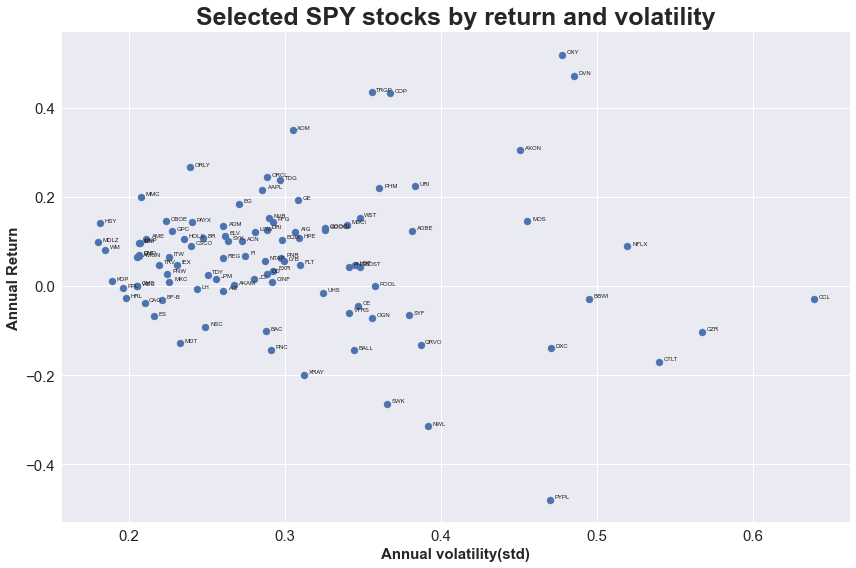

In [11]:
summary.plot.scatter(x='std',y='mean',s=50,fontsize=15, figsize = (12,8))
plt.xlabel('Annual volatility(std)',fontsize=15)
plt.ylabel('Annual Return',fontsize=15)
plt.title('Selected SPY stocks by return and volatility',fontsize=25)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,'std']+0.003,summary.loc[i,'mean']+0.003),size=6)


# K-Means Clustering
To conduct effective clustering we must first measure inertia in order to calculate how well our data is being clustered by the KMeans algorithms over varying numbers of clusters. It works by calcuating the distance between each data point and its cluster centroid, squaring this distance and summing these across all points in the cluster.


Using an Elbow Curve Plot we can determine the optimal number of clusters where adding another cluster does not significantly reduce the inertia.

Text(0, 0.5, 'Inertia')

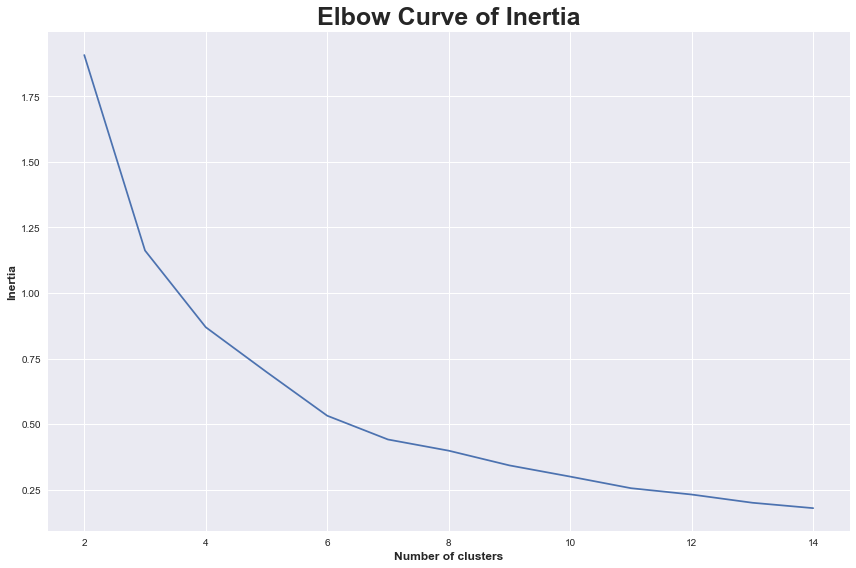

In [12]:
inert = [KMeans(n_clusters=k,n_init=10).fit(summary).inertia_ for k in range(2,15)]
plt.plot(range(2,15),inert)
plt.title('Elbow Curve of Inertia', fontsize = 25)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We can estimate the point after which adding more clusters does not significantly reduce inertia. For our chart this looks like it is around 5.

Next we shall create and plot our clusters (categorising our stocks with respect to them in a new Cluster column in our dataframe)

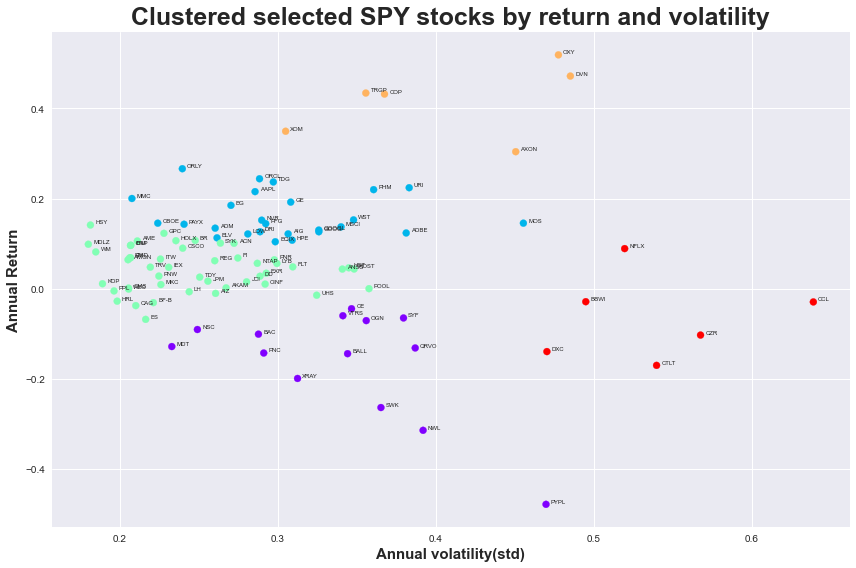

In [13]:
kmeans = KMeans(n_clusters=5, n_init=10).fit(summary)

# Label our stocks with its corresponding cluster
summary['Cluster'] = kmeans.fit_predict(summary)
summary['Cluster'] = summary['Cluster'].astype('category')

plt.scatter(x=summary['std'],
            y=summary['mean'],
            c=kmeans.labels_,
            cmap='rainbow')
plt.xlabel('Annual volatility(std)',fontsize=15)
plt.ylabel('Annual Return',fontsize=15)
plt.title('Clustered selected SPY stocks by return and volatility',fontsize=25)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,'std']+0.003,summary.loc[i,'mean']+0.003),size=6)

We now have our stocks in corresponding clusters.

We can use this analysis to diversify stock portfolios by reducing exposure to stocks in similar clusters. Kmeans can also be a great way to pick pairs trading candidates by identifying economically linked stocks.

We shall now construct a portfolio of 1 stock from each cluster - for this strategy I will choose the one with the least corresponding risk (std). 

In [14]:
summary.sort_values(by='Cluster')
stockpicks = summary.groupby('Cluster')['std'].idxmin()
stockpicks = [stockpicks.to_frame().loc[i,'std'] for i in stockpicks.index]
stockpicks

['MDT', 'MMC', 'MDLZ', 'XOM', 'DXC']

## We shall now conduct some analysis on how the stocks we have picked for our porfolio would have performed over the past 5 years.

In [15]:
# Get the normalised and original closing price data
# for the last 5 years of our chosen stocks
normPrices = normClose[stockpicks]
prices = close[stockpicks]

Here we plot the 5 year price data for our chosen stocks, we do this using normalised returns so that we can make an informed comparison without our axis being skewed by stocks extremely high or low share values.

Text(0.5, 1.0, '5 year price data for our chosen stocks')

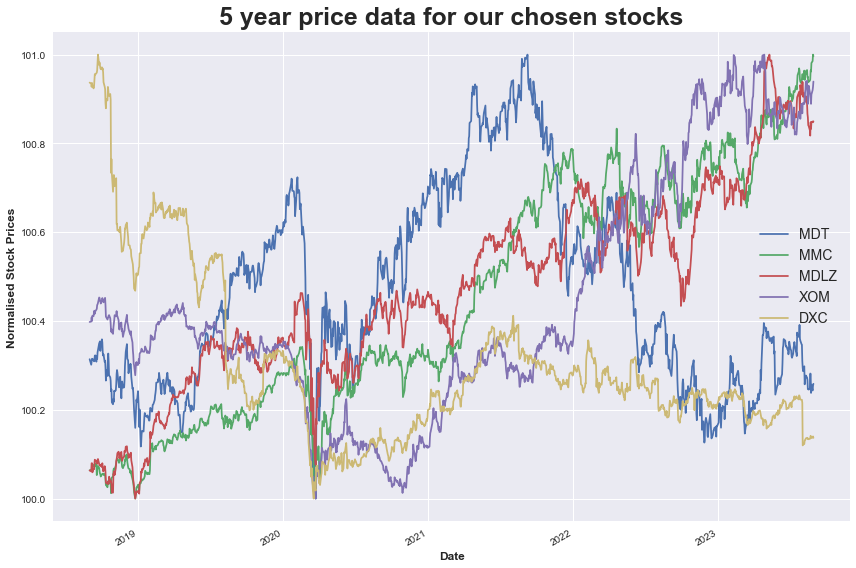

In [16]:
normPrices.plot()
plt.ylabel('Normalised Stock Prices')
plt.title('5 year price data for our chosen stocks', fontsize=25)

Next, we calculate some statistics to analyse these stocks and find the stock that had the least max drawdown percent over the period!

We also calculate annualised mean return, annualised standard deviation and how much 1 dollar from the start would be worth at the end of the 5 year period.

To do this we calculate daily log returns(dlr), cumulative dlr, cumulative maxima and the current drawdowns and drawdown percents for our stocks at each point in our time series.

(Note we give returns as a multiplier of the previous corresponding price)

In [17]:
#We append some data such as daily log and cumulative returns to a priceStats dataframe
#We create a new dataframe called stats with data such as price factor and
#annual mean and annual std of returns
priceStats = prices.copy()
stats = pd.DataFrame(columns = [stockpicks],
                     index = ['pricefactor',
                              'meanreturns',
                              'stdreturns',
                              'maxdrawdown',
                              'maxdrawdownpct'])
for column in priceStats.columns:
    priceStats.insert(priceStats.columns.get_loc(column)+1,
                  f'{column}_dlr',
                  np.log(priceStats[column].div(priceStats[column].shift(1))))
    priceStats.insert(priceStats.columns.get_loc(column)+2,
                  f'{column}_cumreturns',
                  priceStats[f'{column}_dlr'].cumsum().apply(np.exp))
    priceStats.insert(priceStats.columns.get_loc(column)+3,
                  f'{column}_cummax',
                  priceStats[f'{column}_cumreturns'].cummax())
    priceStats.insert(priceStats.columns.get_loc(column)+4,
                  f'{column}_drawdown',
                  priceStats[f'{column}_cummax']-priceStats[f'{column}_cumreturns'])
    priceStats.insert(priceStats.columns.get_loc(column)+5,
                  f'{column}_drawdownpct',
                  priceStats[f'{column}_drawdown']/priceStats[f'{column}_cummax'])
    statlist = []
    statlist.append(np.exp(priceStats[f'{column}_dlr'].sum()))
    statlist.append(priceStats[f'{column}_dlr'].mean()*252)
    statlist.append(priceStats[f'{column}_dlr'].std()*np.sqrt(252))
    statlist.append(priceStats[f'{column}_drawdown'].max())
    statlist.append(priceStats[f'{column}_drawdownpct'].max())
    stats[column] = statlist
    
priceStats.dropna(inplace=True)
priceStats.head()

,MDT,MDT_dlr,MDT_cumreturns,MDT_cummax,MDT_drawdown,MDT_drawdownpct,MMC,MMC_dlr,MMC_cumreturns,MMC_cummax,...,XOM_cumreturns,XOM_cummax,XOM_drawdown,XOM_drawdownpct,DXC,DXC_dlr,DXC_cumreturns,DXC_cummax,DXC_drawdown,DXC_drawdownpct
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-04,84.931877,-0.008856,0.991183,0.991183,0.000000,0.000000,78.197929,0.001771,1.001772,1.001772,...,1.001497,1.001497,0.000000,0.000000,86.963913,-0.002092,0.997910,0.99791,0.000000,0.000000
2018-09-05,85.358505,0.005011,0.996162,0.996162,0.000000,0.000000,78.299385,0.001297,1.003072,1.003072,...,1.014843,1.014843,0.000000,0.000000,86.350349,-0.007080,0.990869,0.99791,0.007041,0.007055
2018-09-06,85.758438,0.004674,1.000829,1.000829,0.000000,0.000000,78.714455,0.005287,1.008389,1.008389,...,1.003617,1.014843,0.011226,0.011062,87.078964,0.008402,0.999230,0.99923,0.000000,0.000000
2018-09-07,85.607338,-0.001763,0.999066,1.000829,0.001763,0.001762,79.074173,0.004560,1.012998,1.012998,...,1.020706,1.020706,0.000000,0.000000,86.474968,-0.006960,0.992299,0.99923,0.006931,0.006936
2018-09-10,85.651787,0.000519,0.999585,1.000829,0.001245,0.001244,79.461578,0.004887,1.017961,1.017961,...,1.019209,1.020706,0.001497,0.001467,86.062737,-0.004778,0.987569,0.99923,0.011661,0.011670


In [18]:
stats 

,MDT,MMC,MDLZ,XOM,DXC
pricefactor,0.960585,2.512824,1.872787,1.787915,0.235467
meanreturns,-0.008068,0.184868,0.125885,0.116580,-0.290158
stdreturns,0.266812,0.240327,0.217551,0.343378,0.612351
maxdrawdown,0.622190,0.519461,0.429373,0.658996,0.955523
maxdrawdownpct,0.417996,0.357974,0.297420,0.610066,0.901194


We will now pick the stock with the greatest max drawdown and will analyse some of the statistics about if we had invested in this stock.

In [19]:
pick = stats.loc['maxdrawdownpct'].idxmax()[0]
pick

'DXC'

Below we have some data about the stock:

**Price factor** is how much 1 dollar invested at the start of 5 years would be worth today.<br>
**Mean returns** is how much our average annualised (log) returns was.<br>
**Std returns** is how much our annualised std of log returns was.<br>
**Max drawdown** is the maximum price by which the stock price dropped from its' most recent high.<br>
**Max drawdown percent** is the percent of the previous maximum that it dropped by at its' max drawdown.

In [20]:
pickstats = stats.loc[:,pick]
pickstats

,DXC
pricefactor,0.235467
meanreturns,-0.290158
stdreturns,0.612351
maxdrawdown,0.955523
maxdrawdownpct,0.901194


To visualise the drawdowns we plot the cumulative returns and corresponding local maxima.
From the plot we can take an informed guess as to when the maximal drawdown occured.

Text(0.5, 1.0, ' DXC Cumulative and Max Cumulative Returns Over Time')

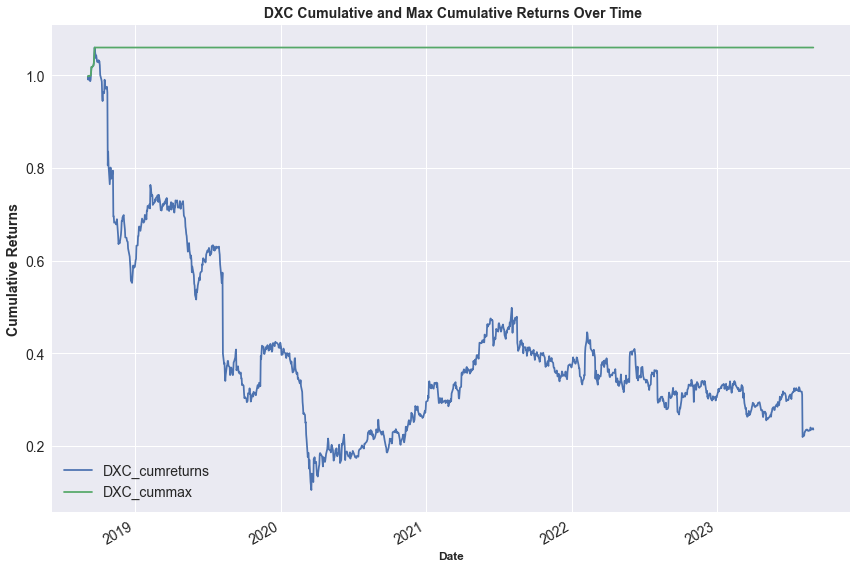

In [21]:
cols = [f'{pick}_cumreturns',f'{pick}_cummax']
cols
priceStats[cols].plot(figsize = (12,8), fontsize =14)
plt.ylabel('Cumulative Returns', fontsize = 14)
plt.title(f' {pick} Cumulative and Max Cumulative Returns Over Time')

And as we would predict from the graph, here is the day that this drawdown occured.

In [22]:
print((priceStats.loc[(priceStats[f'{pick}_drawdown']==priceStats[f'{pick}_drawdown'].max())].index))

DatetimeIndex(['2020-03-18'], dtype='datetime64[ns]', name='Date', freq=None)


We next explore the correlations between our 5 stock picks pricing over time to explore how our diversification attempts performed.

Text(0.5, 1.0, 'Price Correlation Heatmap')

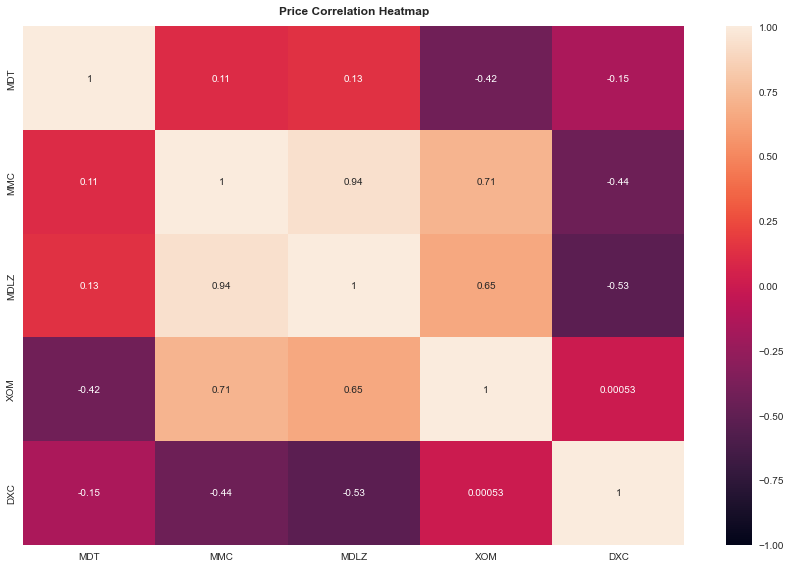

<Figure size 720x288 with 0 Axes>

In [23]:
import seaborn as sns
heatmap = sns.heatmap(prices.corr(),vmin=-1,vmax=1,annot=True)
plt.figure(figsize=(10, 4))
heatmap.set_title('Price Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

We see above that despite our diversification attempts, there may still be high correlation between certain stocks we have picked implying this may not be the most useful method to diversify a portfolio.

# Portfolio Allocation

In addition to our portfolio choice, we must allocate a position to each of our 5 stocks and do so in a way that Sharpe Ratios (that we will discuss shortly) are maximised  but first will analyse how simply equally splitting our allocation (20% each) would affect our portfolio.

We start by normalising our returns against the initial price at the start of the 5 year period to calculate final allocations for each stock based on given allocation percentages.

In [24]:
normdf = pd.DataFrame()
for stock in stockpicks:
    normdf[f'{stock}_normret']=prices[stock]/prices.loc[datetime.strftime(date5yrAgo, '%Y-%m-%d'),stock]

In [25]:
normdf.head()

,MDT_normret,MMC_normret,MDLZ_normret,XOM_normret,DXC_normret
Date,,,,,
2018-08-31,1.000000,1.000000,1.000000,1.000000,1.000000
2018-09-04,0.991183,1.001772,0.997659,1.001497,0.997910
2018-09-05,0.996162,1.003072,1.018024,1.014843,0.990869
2018-09-06,1.000829,1.008389,1.018024,1.003617,0.999230
2018-09-07,0.999066,1.012998,0.995318,1.020706,0.992299


We shall now demonstrate a portfolio allocation doing an even 20% split for each of the 5 stocks

In [26]:
aloc = [.2,.2,.2,.2,.2]

In [27]:
alocdf = pd.DataFrame()
for stock,alocpct in zip(stockpicks,aloc):
    alocdf[f'{stock}_alloc']=normdf[f'{stock}_normret']*alocpct

In [28]:
alocdf

,MDT_alloc,MMC_alloc,MDLZ_alloc,XOM_alloc,DXC_alloc
Date,,,,,
2018-08-31,0.200000,0.200000,0.200000,0.200000,0.200000
2018-09-04,0.198237,0.200354,0.199532,0.200299,0.199582
2018-09-05,0.199232,0.200614,0.203605,0.202969,0.198174
2018-09-06,0.200166,0.201678,0.203605,0.200723,0.199846
2018-09-07,0.199813,0.202600,0.199064,0.204141,0.198460
...,...,...,...,...,...
2023-08-24,0.189199,0.491394,0.370789,0.342974,0.047369
2023-08-25,0.191837,0.497594,0.374191,0.349101,0.047047
2023-08-28,0.189970,0.499029,0.374453,0.352036,0.047254


And can then simulate the performance of our positions if we had invested $100,000 initially for example.

In [29]:
posdf = pd.DataFrame()
investment = 100000
for stock in stockpicks:
    posdf[f'{stock}_position']=alocdf[f'{stock}_alloc']*investment

In [30]:
posdf

,MDT_position,MMC_position,MDLZ_position,XOM_position,DXC_position
Date,,,,,
2018-08-31,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
2018-09-04,19823.664655,20035.447653,19953.178447,20029.936232,19958.194462
2018-09-05,19923.242492,20061.442077,20360.483831,20296.868660,19817.381796
2018-09-06,20016.589480,20167.788944,20360.483831,20072.349380,19984.598697
2018-09-07,19981.321699,20259.954014,19906.368873,20414.121157,19845.981715
...,...,...,...,...,...
2023-08-24,18919.942225,49139.387720,37078.928445,34297.387690,4736.874267
2023-08-25,19183.692876,49759.430382,37419.102906,34910.129485,4704.744445
2023-08-28,18996.966846,49902.909907,37445.271708,35203.601501,4725.399456


As we can see this dataframe shows the value of each of stock positions at each time, we shall create a sum for each date to show our portfolio value and plot how this changes over time along with individual stock performances.

In [31]:
posdf['total_position'] = posdf.sum(axis=1)

Text(0, 0.5, 'Portfolio Value')

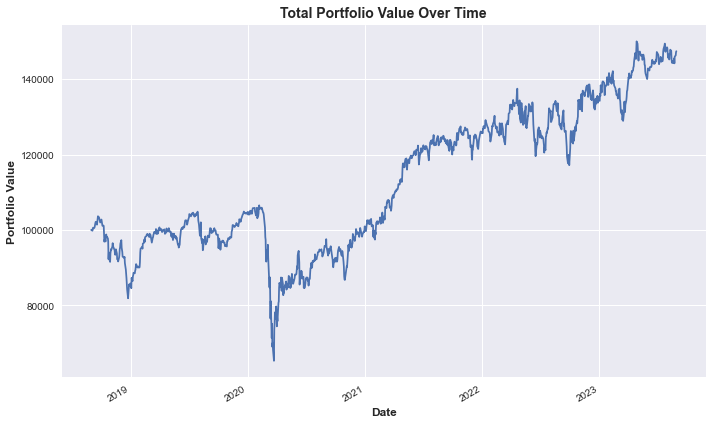

In [32]:
posdf['total_position'].plot(figsize=(10,6))
plt.title('Total Portfolio Value Over Time')
plt.ylabel('Portfolio Value')

Text(0, 0.5, 'Allocation Value')

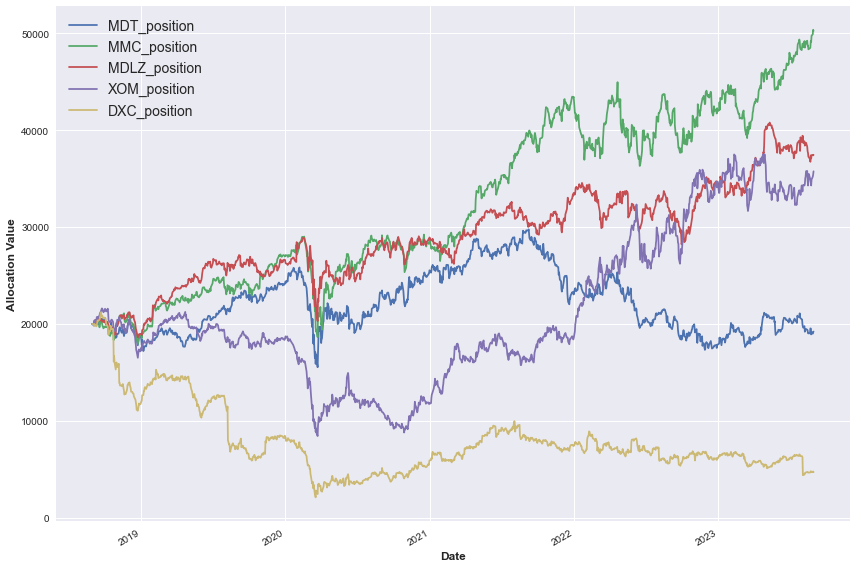

In [33]:
posdf.drop('total_position',axis=1).plot(kind='line')
plt.ylabel('Allocation Value')

# Optimising and Sharpe Ratios

We now will try to optimise our portfolio allocation by maximising Sharpe ratios. Sharpe ratios give us a way to quantify the relationship between mean daily returns and volatility.
The Sharpe equation is:

$$ S = (\frac{R_{p}-R_{f}}{ \sigma_{p}}) $$

Where $R_p$ is the expected portfolio return, $R_f$ is the risk-free return, and $\sigma_p$ is the standard deviation of the portfolio.


One way to maximise this would be through a Monte-Carlo simulation where we effectively just check a load of random allocations and see which gives the best Sharpe Ratio. This in theory works well. However, guessing and checking is definitely not the most efficient way of finding the optimal portfolio and hence we shall use a different and more mathematical method using an optimiser function.

We begin by calculating log returns as we did earlier.

In [34]:
log_rets = np.log(prices.div(prices.shift(1)))
log_rets.head()

,MDT,MMC,MDLZ,XOM,DXC
Date,,,,,
2018-08-31,NaN,NaN,NaN,NaN,NaN
2018-09-04,-0.008856,0.001771,-0.002344,0.001496,-0.002092
2018-09-05,0.005011,0.001297,0.020208,0.013239,-0.007080
2018-09-06,0.004674,0.005287,0.000000,-0.011123,0.008402
2018-09-07,-0.001763,0.004560,-0.022556,0.016884,-0.006960


We define a function taking weights of each stock and returning returns, volatility and the Sharpe ratio.

In [35]:
def portfolio_calc(weights):
    weights = np.array(weights)
    expected_ret = np.sum((log_rets.mean()*weights)*252)
    
    alloc = np.dot(log_rets.cov()*252,weights)
    
    expected_std = np.sqrt(np.dot(weights.T,alloc))
    
    sharpe = expected_ret/expected_std
    return([expected_ret,expected_std,sharpe])

To optimise our function we use SciPy's minimize function in order minimise the negative Sharpe Ratio and hence maximise Sharpe Ratio. 

The method we will be using is Sequential Least-Squares Porgramming as it is fast and simple to use for tasks like this.

In [36]:
from scipy.optimize import minimize

In [37]:
def negate_sharpe(weights):
    # Take the 2 indexed term from our array (Sharpe Ratio)
    # And negate it
    sr = portfolio_calc(weights)[2]*-1
    return sr

We next create a function to check our weights such that they sum to 1. If they do our function will return 0.

We then must give constraints, bounds and an initial guess.

In [38]:
def check_weights(weights):
    return (np.sum(weights)-1)

In [39]:
constraints = ({'type':'eq','fun':check_weights})
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))
initial_guess = [0.2,0.2,0.2,0.2,0.2]

In [40]:
results = minimize(negate_sharpe,
                   initial_guess,method = 'SLSQP',
                   bounds=bounds,
                   constraints=constraints)

In [41]:
results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.7819718064179411
       x: [ 0.000e+00  7.716e-01  2.284e-01  7.593e-14  0.000e+00]
     nit: 6
     jac: [ 6.109e-01 -7.100e-05  2.398e-04  4.623e-03  2.315e+00]
    nfev: 36
    njev: 6

We now have our optimised weight allocation!
(and can check that the sum of weights is 1 as required)

In [42]:
optimal_weights = results.x
optimal_weights

array([0.00000000e+00, 7.71555441e-01, 2.28444559e-01, 7.59305637e-14,
       0.00000000e+00])

In [43]:
optimal_weights.sum()

1.000000000000155

As we did with the equal weight portfolio we shall plot our newly calculated, optimised portfolio weights and see how an investment of $100,000 in this portfolio would have performed. (We include the previous graph for comparison)

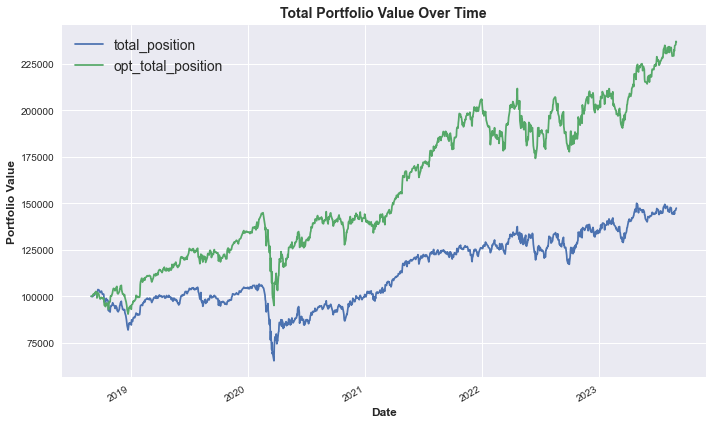

In [44]:
normdf = pd.DataFrame()
for stock in stockpicks:
    normdf[f'{stock}_normret']=prices[stock]/prices.loc[datetime.strftime(date5yrAgo, '%Y-%m-%d'),stock]
optalocdf = pd.DataFrame()

for stock,optalocpct in zip(stockpicks,optimal_weights):
    optalocdf[f'{stock}_alloc']=normdf[f'{stock}_normret']*optalocpct
    
optposdf = pd.DataFrame()
investment = 100000
for stock in stockpicks:
    optposdf[f'{stock}_position']=optalocdf[f'{stock}_alloc']*investment
    
optposdf['opt_total_position'] = optposdf.sum(axis=1)

posdf['total_position'].plot(figsize=(10,6))
plt.title('Total Portfolio Value Over Time')
plt.ylabel('Portfolio Value')

optposdf['opt_total_position'].plot()
plt.legend()

We can clearly see that our optimisation enhanced our return over the 5 year period. We must keep in mind however that this is all in hindsight and that we could not yet know the certain most optimal portfolio allocation until this had already happened. This does however give us some idea into how we could potentially use past sharpe ratio maximising to optimise portfolio allocations for the future.

# Efficient Frontier

We shall now find the set of optimal portfolios which would have had the highest expected return for the least risk for each given expected return level.

In [45]:
front_level = np.linspace(-0.4,0.5,200)

In [46]:
# Function to obtain minimum std using our previous method
def min_std(weights):
    std = portfolio_calc(weights)[1]
    return std

We next must iterate through our returns (the frontier) and calculate the minimum volatility for each using the SciPy minimize function once again with our previous initial guess, bounds and constraints.

In [47]:
front_std = []

for exp_ret in front_level:
    constraints = ({'type':'eq','fun':check_weights},
                   {'type':'eq','fun':lambda x: portfolio_calc(x)[0]-exp_ret})
    #Above we find the difference between our return and expected return 
    
    result = minimize(min_std,
                      initial_guess,
                      method='SLSQP',
                      bounds = bounds,
                      constraints=constraints)
    
    front_std.append(result['fun'])
                      

We can now plot our efficient frontier using our frontier levels(returns) and volatilities(stds).

And the point where our maximum sharpe level occurs

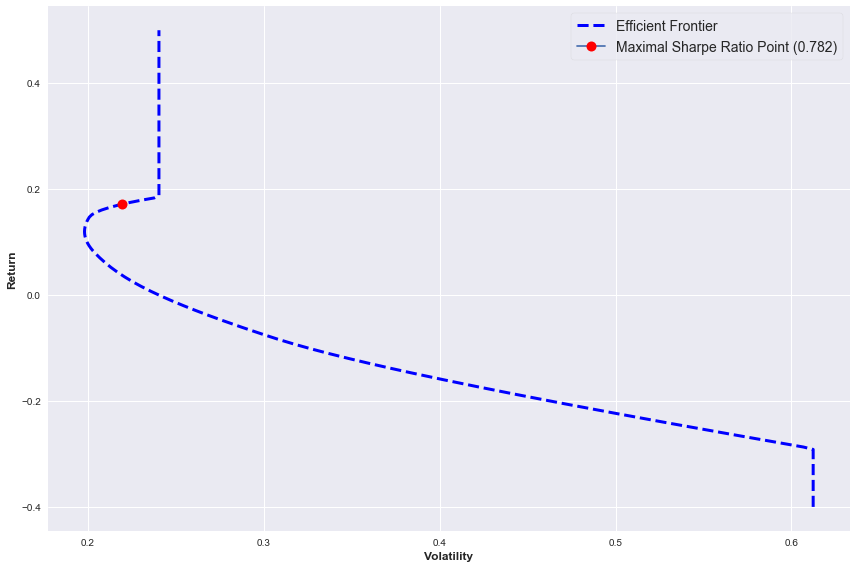

In [48]:
plt.plot(front_std,front_level,'b--',linewidth=3)
plt.xlabel('Volatility')
plt.ylabel('Return')
max_sharpestd = portfolio_calc(optimal_weights)[1]
max_sharperet = portfolio_calc(optimal_weights)[0]
max_sharpe = portfolio_calc(optimal_weights)[2]
plt.plot(max_sharpestd,
         max_sharperet,
         marker="o",
         markersize=10,
         markerfacecolor="red")
location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["Efficient Frontier", f"Maximal Sharpe Ratio Point ({round(max_sharpe,3)})"], loc=0,frameon=legend_drawn_flag )

We conclude by noticing how each of the points on the bullet shaped curve would maximise return for a given level of volatility and how the tangency portfolio (the one that maximises Sharpe Ratio) lies at a seemingly perfect tradeoff of risk/return.

In practice it is important to note that Markovitz's model that we have used here has a lot of assumptions and does not necessarily mean this allocation will perform the best into the future.

However, the main risk is that this theory only encorporates variance rather than size of downside risk. As such a portfolio with few huge drawdowns could be valued at the same risk level as a portfolio with more frequent small amounts of variance despite the fact that the majority of people would feel much more comfortable to hold assets through many little price movements rather than a couple sporadic drops.